In [2]:
import pandas as pd
import numpy as np

url = '.\대출금리\개인사업자 대출\기업대출금리(보증서담보-개인사업자).csv'
class read():
    credit_distribution = pd.read_csv('.\신용등급분포.csv', encoding='cp949')
    cd = np.array(credit_distribution['구성 비율']).astype('float')
    

    def __init__(self,url):
        self.loan_dev = url

    def tidy(self):
        self.loan_dev = pd.read_csv(self.loan_dev,encoding='cp949')
        self.loan_dev['은행'] = self.loan_dev['은행'].str.strip()
        self.loan_dev.columns = ['은행','구분','1~2등급','3~4등급','5~6등급','7~8등급','9~10등급','평균금리','참고사항']
        self.loan_dev.drop([0],axis=0,inplace=True)
        self.loan_dev.drop(['참고사항','구분'],axis=1,inplace=True)
        self.loan_dev['평균금리']=self.loan_dev['평균금리'].replace('-',np.NaN)
        self.loan_dev.dropna(axis=0,inplace=True)
        self.loan_dev.reset_index(drop=True,inplace=True)
        self.loan_dev.replace('-',0,inplace=True)
        self.interest_grade = self.loan_dev.loc[:,'1~2등급':'9~10등급']
        return self.loan_dev

    def multi(self):
        self.a = []
        for i in range(len(self.interest_grade)):
            self.rate_grade = np.array(self.interest_grade.loc[i:i,'1~2등급':'9~10등급'], dtype='float')[0]
            #은행 상품 단위 신용 등급 별 이자율
            self.boolean = self.rate_grade.astype('bool')
            #상품의 대상 고객 
            self.ac_cd = sum(self.boolean * self.cd)
            # 전체 신용 등급 대비 타겟 고객 비율
            self.customer_ration = self.cd / self.ac_cd
            # 타겟 고객 대비 특정 신용 등급 고객 비율
            self.real_income = self.rate_grade @ self.customer_ration
            # 대출 금리에 대한 실제 고객의 가중 평균으로 구한 상품 수익률
            self.a.append(self.real_income)
        
        self.loan_dev['가중평균수익'] = self.a
        return self.loan_dev


a = read(url)
a.tidy()
a.multi()

C:\Users\LG\AppData\Local\Temp\ipykernel_6264\2752344821.py:35: RuntimeWarning: divide by zero encountered in true_divide
  self.customer_ration = self.cd / self.ac_cd
C:\Users\LG\AppData\Local\Temp\ipykernel_6264\2752344821.py:37: RuntimeWarning: invalid value encountered in matmul
  self.real_income = self.rate_grade @ self.customer_ration


,은행,1~2등급,3~4등급,5~6등급,7~8등급,9~10등급,평균금리,가중평균수익
0,BNK경남은행,2.76,3.07,3.46,3.81,0,3.05,3.031643
1,BNK부산은행,2.92,3.27,3.44,3.60,4.04,3.13,3.179447
2,DGB대구은행,2.29,3.07,3.40,3.59,0,2.92,2.764938
3,IBK기업은행,2.90,3.25,3.42,3.95,4.32,3.28,3.176758
4,KB국민은행,2.32,3.47,3.70,4.20,3.84,3.16,2.982733
5,KDB산업은행,0,0,0,0,0,3.27,NaN
6,NH농협은행,2.38,3.28,3.45,3.81,3.67,2.90,2.899669
7,SH수협은행,3.18,3.29,3.54,3.53,0,3.31,3.308985
8,광주은행,3.53,3.69,3.66,4.22,5.70,3.61,3.694064
9,스탠다드차타드은행,2.66,3.92,4.09,4.15,0,3.55,3.312666


C:\Users\LG\AppData\Local\Temp\ipykernel_6264\2752344821.py:35: RuntimeWarning: divide by zero encountered in true_divide
  self.customer_ration = self.cd / self.ac_cd
C:\Users\LG\AppData\Local\Temp\ipykernel_6264\2752344821.py:37: RuntimeWarning: invalid value encountered in matmul
  self.real_income = self.rate_grade @ self.customer_ration
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(byt

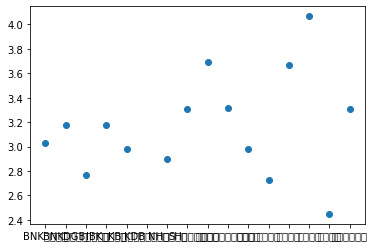

In [3]:
import matplotlib.pyplot as plt
x = a.multi()['은행']
y = a.multi()['가중평균수익']

plt.scatter(x,y)
plt.show()